<a href="https://colab.research.google.com/github/ram130849/ML_Algorithms/blob/main/classification/K_Nearest_Neighbors_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For Regression Task, Average of the class labels of the train datapoints is considered to be as the class labels of the test datapoints.

For Classification Task, Mode of the class labels of the train datapoints is considered to be as the class labels of the test datapoints.

KNN Algorithm for Regression.

KNN is a non-parametric supervised machine learning model which stores all the data available and predicts new cases based on a chosen similarity metric. The idea to predict the value of the new case based on the K nearest values available w.r.t to the similarity metric. It can be used for classification and regression problems.

What are parametric and non parametric methods ?

Any machine learning model can be explained by the learning function it uses. This function maps from the X (independent) variables to the Y(dependent) variables. In a parametric model, we assume a defined learning function and try to build a model by fitting the training data to the learning function to find the model coefficients. Increase in the data would not alter the learning function of this model. Examples of parametric methods are logistic regression and simple neural networks.

Where as, in a non parametric model, we do not presume any fixed form of learning function and are free to learn any mapping function based on the training data. The most common examples are KNN and SVM.

What is the similarity metric for KNN ?
The common similarity metric used is Euclidian distance. Alternatively we can also use manhattan distance depending on the problem. The KNN model stores all the training data set and when a new test data point is given the aim is to find K points from the training set which are closest to the test data point. So here we are trying to find the points which minimise the similarity metric.

In some high dimensional datasets, cosine similarity metric is also used where we try to find the K data points which maximise the cosine value.

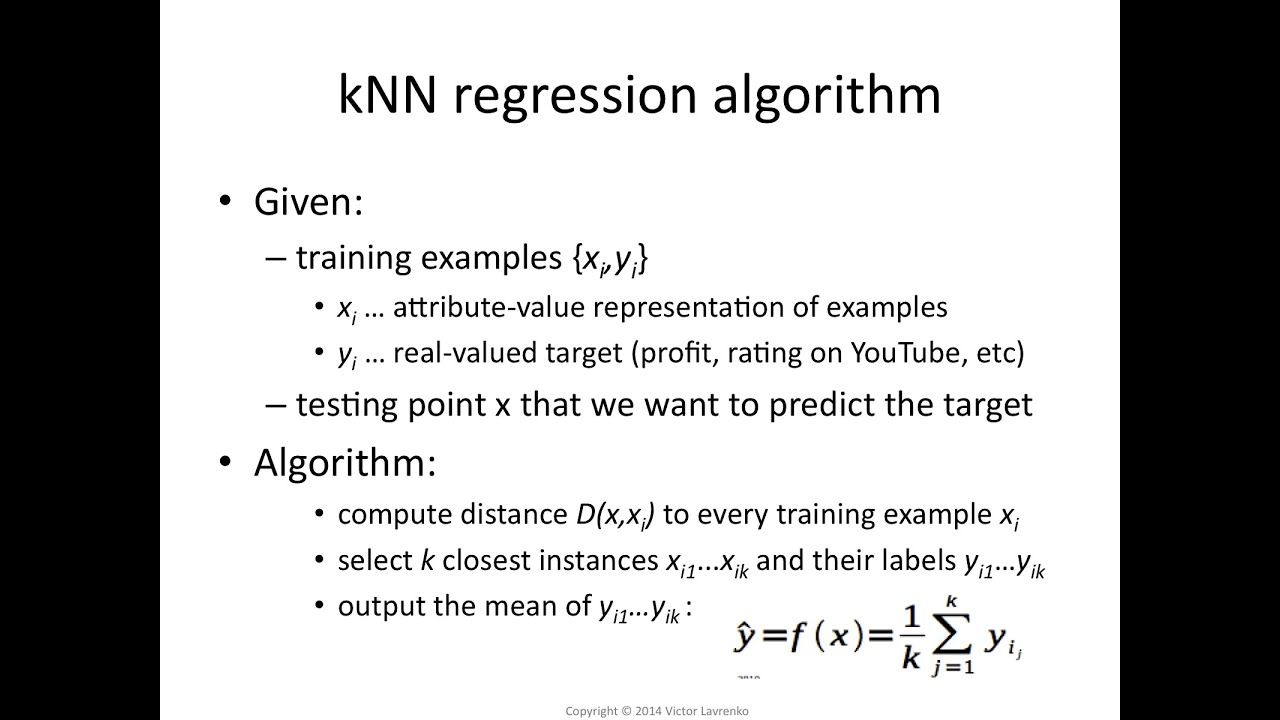

In [3]:
from sklearn.datasets import load_diabetes,load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [4]:
X, y = load_diabetes(return_X_y=True)

#Setting the train and test split percentage 
train_split_percent = 0.7

In [5]:
size = X.shape[0]
X_train = X[:int(train_split_percent * size),:]
X_test = X[int(train_split_percent * size):,:]
y_train = y[:int(train_split_percent * size)]
y_test = y[int(train_split_percent * size):]

In [6]:
#Standardizing the X_train and X_test daatsets
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)

X_train = (X_train - mu ) / sigma

#We use the same mean and SD as the one of X_train as we dont know the mean of X_test
X_test = (X_test - mu ) / sigma

#Standardizing the y_train data
mu_y = np.mean(y_train, 0)
sigma_y = np.std(y_train, 0, ddof = 0)

y_train = (y_train - mu_y ) / sigma_y
y_test = (y_test - mu_y) / sigma_y

In [7]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
y_pred = np.zeros(y_test.shape)
y_train.shape, y_test.shape,y_pred.shape

((309, 1), (133, 1), (133, 1))

In [8]:
n_neigh = 10
for row in range(len(X_test)):
    euclidian_distance = np.sqrt(np.sum((X_train - X_test[row])**2, axis = 1))
    y_pred[row] = y_train[np.argsort(euclidian_distance, axis = 0)[:n_neigh]].mean()* sigma_y + mu_y
    
#Finding the root mean squared error 
RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
print(RMSE)

162.89503940673393


In [9]:
# Getting the optimal K value from the list of k values.
k_list = [x for x in range(1,50,1)]

distance = np.sqrt(((X_train[:, :, None] - X_test[:, :, None].T) ** 2).sum(1))

sorted_distance = np.argsort(distance, axis = 0)

def knn(X_train,X_test,y_train,y_test,sorted_distance,k):
    y_pred = np.zeros(y_test.shape)
    for row in range(len(X_test)):
        y_pred[row] = y_train[sorted_distance[:,row][:k]].mean() * sigma_y + mu_y

    RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
    return RMSE

rmse_list = []
for i in k_list:
    rmse_list.append(knn(X_train,X_test,y_train,y_test,sorted_distance,i))

In [10]:
#Finding the optimal K value
min_rmse_k_value = k_list[rmse_list.index(min(rmse_list))]
print("Minimum RMSE K value:",min_rmse_k_value)
#Finding the lowest possible RMSE
optimal_RMSE = knn(X_train,X_test,y_train,y_test,sorted_distance,min_rmse_k_value)
print("Optimal RMSE Value for k-value {} is:".format(min_rmse_k_value),optimal_RMSE)

Minimum RMSE K value: 49
Optimal RMSE Value for k-value 49 is: 156.2821733502422


[]

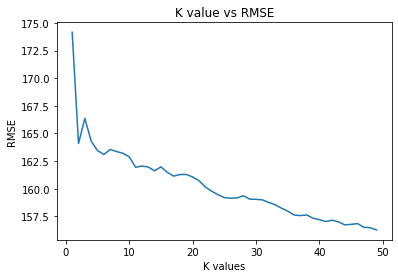

In [11]:
plt.plot(k_list,rmse_list)
plt.title("K value vs RMSE")
plt.xlabel("K values")
plt.ylabel("RMSE")
plt.plot()

KNN Algorithm for Classification:

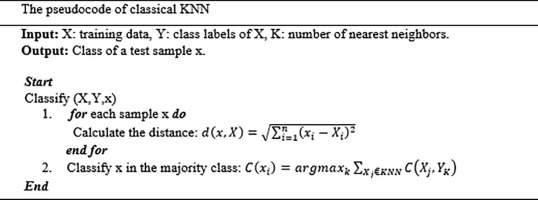

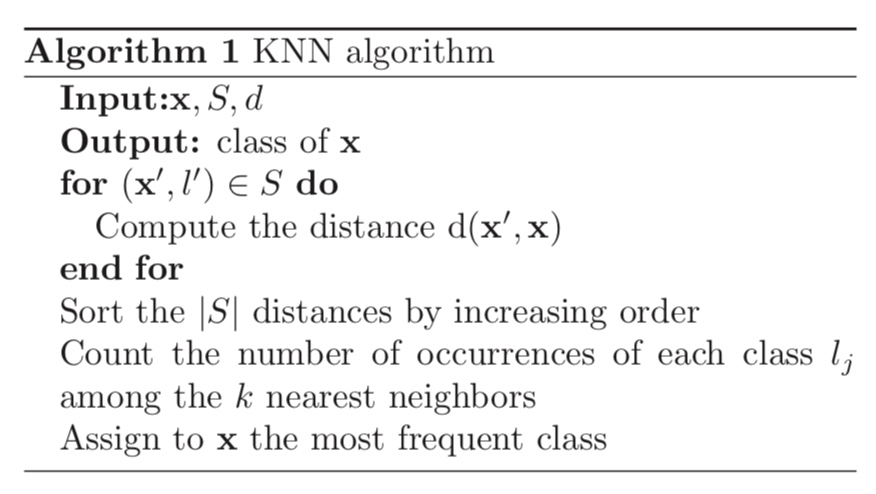

In [12]:
X, y = load_wine(return_X_y=True)

#Setting the train and test split percentage 
train_split_percent = 0.7

In [13]:
size = X.shape[0]
X_train = X[:int(train_split_percent * size),:]
X_test = X[int(train_split_percent * size):,:]
y_train = y[:int(train_split_percent * size)]
y_test = y[int(train_split_percent * size):]

In [14]:
#Standardizing the X_train and X_test daatsets
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)

X_train = (X_train - mu ) / sigma

#We use the same mean and SD as the one of X_train as we dont know the mean of X_test
X_test = (X_test - mu ) / sigma

#Standardizing the y_train data
mu_y = np.mean(y_train, 0)
sigma_y = np.std(y_train, 0, ddof = 0)

y_train = (y_train - mu_y ) / sigma_y
y_test = (y_test - mu_y) / sigma_y

In [15]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
y_pred = np.zeros(y_test.shape)
y_train.shape, y_test.shape,y_pred.shape

((124, 1), (54, 1), (54, 1))

In [16]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
          distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 
# Test distance function
dataset = [[2.7810836,2.550537003,0],
          [1.465489372,2.362125076,0],
          [3.396561688,4.400293529,0],
          [1.38807019,1.850220317,0],
          [3.06407232,3.005305973,0],
          [7.627531214,2.759262235,1],
          [5.332441248,2.088626775,1],
          [6.922596716,1.77106367,1],
          [8.675418651,-0.242068655,1],
          [7.673756466,3.508563011,1]]
row0 = dataset[0]

for row in dataset:
    distance = euclidean_distance(row0, row)
    print(distance)

0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411
2.592833759950511
4.214227042632867
6.522409988228337
4.985585382449795


In [17]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
          dist = euclidean_distance(test_row, train_row)
          distances.append((train_row, dist))
          distances.sort(key=lambda x: x[1])
    neighbors = list()
    for i in range(num_neighbors):
          neighbors.append(distances[i][0])
    return neighbors

In [18]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [19]:
prediction = predict_classification(dataset, dataset[0], 3)

In [20]:
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    for row in test:
      output = predict_classification(train, row, num_neighbors)
      predictions.append(output)
    return(predictions)

In [21]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if(actual[i] == predicted[i]):
            correct += 1
    return correct / float(len(actual)) * 100.0

In [23]:
predictions = k_nearest_neighbors(X_train,X_test,5)
predictions

[-0.5247511400725214,
 -0.5247511400725214,
 -0.5247511400725214,
 -0.36719180330688805,
 -0.36719180330688805,
 -0.6994987681216785,
 0.17710408733802738,
 0.17710408733802738,
 0.17710408733802738,
 0.17710408733802738,
 -0.8971641178822004,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.9172171243796446,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.8828405418125974,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.8398698136037883,
 0.17710408733802738,
 0.17710408733802738,
 0.17710408733802738,
 -0.8398698136037883,
 0.17710408733802738,
 -0.8398698136037883,
 -0.8398698136037883,
 -1.0260763025086277,
 0.7213999779829428,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.8398698136037883,
 0.17710408733802738,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.8398698136037883,
 -0.83986

In [ ]:
accuracy_metric(predictions,)